In [303]:
#DESCRIPTION: This program predicte if the price of Bitcoin will increase or decrease
#Based on datasets obtained from kaggle

In [304]:
#Importing pandas and numpy
import pandas as pd
import numpy as np

#importing libraries for ploting 
import matplotlib.pyplot as plt
import seaborn as sb

from datetime import datetime
import requests
from time import sleep

#importing Libraries for training the model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [305]:
#importing the dataset
df= pd.read_csv('C:/Users/David Mukege/Desktop/My Courses/SHAPEAI/Machine Learning Projects/RNN_LSTM bitcoin price prediction/bitcoinunix.csv')

In [306]:
#Store the data into variables
df = pd.read_csv('bitcoinunix.csv')

In [307]:
#Show the first few rows of the Bitcoinunix dataset
print('Shape of general_data :',df.shape)
df.head(10)
#The dataset has got 7 different columns that affect the price of Bitcoin

Shape of general_data : (276866, 9)


,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,0,1325241900,4.26,4.26,4.21,4.21,12.33,51.96,4.21
1,1,1325253600,4.50,4.50,4.50,4.50,4.20,18.90,4.50
2,2,1325258100,4.21,4.21,4.21,4.21,39.77,167.43,4.21
3,3,1325259000,4.21,4.21,4.21,4.21,0.44,1.85,4.21
4,4,1325317500,4.39,4.39,4.39,4.39,0.46,2.00,4.39
5,5,1325346300,4.39,4.39,4.39,4.39,48.00,210.72,4.39
6,6,1325349900,4.50,4.57,4.50,4.57,37.86,171.38,4.53
7,7,1325350800,4.58,4.58,4.58,4.58,9.00,41.22,4.58
8,8,1325391300,4.58,4.58,4.58,4.58,1.50,6.88,4.58
9,9,1325430900,4.84,4.84,4.84,4.84,10.00,48.40,4.84


In [308]:
df.info() #shows the summary of the dataset including column datatypes of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276866 entries, 0 to 276865
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         276866 non-null  int64  
 1   Timestamp          276866 non-null  int64  
 2   Open               276866 non-null  float64
 3   High               276866 non-null  float64
 4   Low                276866 non-null  float64
 5   Close              276866 non-null  float64
 6   Volume_(BTC)       276866 non-null  float64
 7   Volume_(Currency)  276866 non-null  float64
 8   Weighted_Price     276866 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 19.0 MB


In [309]:
df.describe() #Calculating some statistical data like percentile,mean, std of the dataframe

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,276866.000000,2.768660e+05,276866.000000,276866.000000,276866.000000,276866.000000,276866.000000,2.768660e+05,276866.000000
mean,138432.500000,1.475536e+09,3898.375518,3908.786492,3887.336767,3898.470747,109.988716,3.444010e+05,3898.121080
std,79924.474152,7.645154e+07,6849.737371,6871.143834,6827.992227,6850.220090,216.980364,8.839427e+05,6849.761874
min,0.000000,1.325242e+09,3.800000,4.140000,3.800000,4.140000,0.000000,0.000000e+00,3.870000
25%,69216.250000,1.410430e+09,316.780000,317.782500,315.652500,316.760000,18.650000,1.003947e+04,316.660000
50%,138432.500000,1.472632e+09,714.000000,715.595000,711.855000,714.020000,47.750000,5.949789e+04,713.930000
75%,207648.750000,1.542161e+09,6542.877500,6552.680000,6532.750000,6543.220000,115.107500,2.991222e+05,6542.747500
max,276865.000000,1.617149e+09,61615.510000,61781.830000,61350.300000,61627.260000,11166.690000,3.449055e+07,61608.640000


In [310]:
#show the structure of the dataset i.e first 5 columns and last 5 columns
df 

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,0,1325241900,4.26,4.26,4.21,4.21,12.33,51.96,4.21
1,1,1325253600,4.50,4.50,4.50,4.50,4.20,18.90,4.50
2,2,1325258100,4.21,4.21,4.21,4.21,39.77,167.43,4.21
3,3,1325259000,4.21,4.21,4.21,4.21,0.44,1.85,4.21
4,4,1325317500,4.39,4.39,4.39,4.39,0.46,2.00,4.39
...,...,...,...,...,...,...,...,...,...
276861,276861,1617145200,58699.43,58734.72,58567.11,58733.62,7.85,460410.98,58628.91
276862,276862,1617146100,58704.85,58748.45,58573.63,58748.45,5.69,334078.89,58662.70
276863,276863,1617147000,58766.56,58766.56,58599.78,58600.00,24.67,1446170.82,58619.58
276864,276864,1617147900,58599.99,58770.38,58599.99,58760.59,40.11,2353284.47,58669.39


In [311]:
#DATA CLEANING

In [312]:
df.isnull().sum() #Check for missing Values and returning the result
#Since there are no null values, contained in the dataset we move on to data exploration

Unnamed: 0           0
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [313]:
#EXPLOLATORY DATA ANALYSIS
df.sort_values('Timestamp',ignore_index=True,inplace=True)  #sorting the data by timestamp

In [314]:
df['timestamp'] = pd.to_datetime(df['Timestamp'],unit='s') #converting the unix time to readable format

In [315]:
#abstracting year and month from the readable time format
df['year'] = df['timestamp'].dt.year
# df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
# df['minute'] = df['timestamp'].dt.strftime('%M')
# df['hours'] = df['timestamp'].dt.strftime('%H')
df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')
# df['seconds']=df['timestamp'].dt.strftime('%S')

In [316]:
df.index = df.timestamp  ## changing the index values according to timestamp

In [317]:
df.index  #checking the outcome after abstracting year and month

DatetimeIndex(['2011-12-30 10:45:00', '2011-12-30 14:00:00',
               '2011-12-30 15:15:00', '2011-12-30 15:30:00',
               '2011-12-31 07:45:00', '2011-12-31 15:45:00',
               '2011-12-31 16:45:00', '2011-12-31 17:00:00',
               '2012-01-01 04:15:00', '2012-01-01 15:15:00',
               ...
               '2021-03-30 21:45:00', '2021-03-30 22:00:00',
               '2021-03-30 22:15:00', '2021-03-30 22:30:00',
               '2021-03-30 22:45:00', '2021-03-30 23:00:00',
               '2021-03-30 23:15:00', '2021-03-30 23:30:00',
               '2021-03-30 23:45:00', '2021-03-31 00:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=276866, freq=None)

In [318]:
df_month = df.resample('M').mean() #resample used for timeseries data

In [319]:
df_month  # showing the dataset with year and month column abstracted from timestamp

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month
timestamp,,,,,,,,,,,
2011-12-31,3.5,1.325297e+09,4.380000,4.388750,4.373750,4.382500,19.007500,8.318250e+01,4.377500,2011.0,12.0
2012-01-31,117.0,1.326698e+09,6.300183,6.332192,6.286484,6.320046,9.223470,5.757671e+01,6.305936,2012.0,1.0
2012-02-29,391.5,1.329317e+09,5.227879,5.236091,5.210182,5.218242,14.577061,7.403767e+01,5.222152,2012.0,2.0
2012-03-31,745.5,1.331871e+09,4.986164,4.992698,4.978413,4.984630,24.179418,1.216323e+02,4.986481,2012.0,3.0
2012-04-30,1177.5,1.334597e+09,5.002058,5.006811,4.997613,5.002490,34.090453,1.701360e+02,5.002263,2012.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,271336.0,1.605132e+09,15502.714746,15537.814496,15466.791148,15504.066806,81.308499,1.250751e+06,15502.640706,2020.0,11.0
2020-12-31,272355.0,1.607910e+09,20027.015287,20074.305935,19983.556451,20030.527703,57.792268,1.185277e+06,20030.894595,2020.0,12.0
2021-01-31,273082.0,1.611337e+09,34247.670671,34390.590968,34082.987987,34242.474039,87.646426,2.984853e+06,34232.815381,2021.0,1.0


In [320]:
mean_df =df.groupby(['Weighted_Price', 'year']).mean()
print (mean_df)

                        Unnamed: 0     Timestamp          Open          High  \
Weighted_Price year                                                            
3.87           2012     225.000000  1.328036e+09      3.800000      6.000000   
4.14           2012     434.000000  1.329582e+09      4.140000      4.140000   
4.16           2012     399.000000  1.329415e+09      4.550000      4.550000   
4.17           2012     389.000000  1.329358e+09      4.170000      4.170000   
4.21           2011       1.666667  1.325253e+09      4.226667      4.226667   
...                            ...           ...           ...           ...   
61447.95       2021  275413.000000  1.615682e+09  61600.230000  61600.230000   
61453.01       2021  275398.000000  1.615669e+09  61601.930000  61700.000000   
61526.17       2021  275412.000000  1.615681e+09  61363.340000  61700.000000   
61556.05       2021  275397.000000  1.615668e+09  61615.510000  61711.620000   
61608.64       2021  275396.000000  1.61

In [321]:
#DATA VISUALIZATION

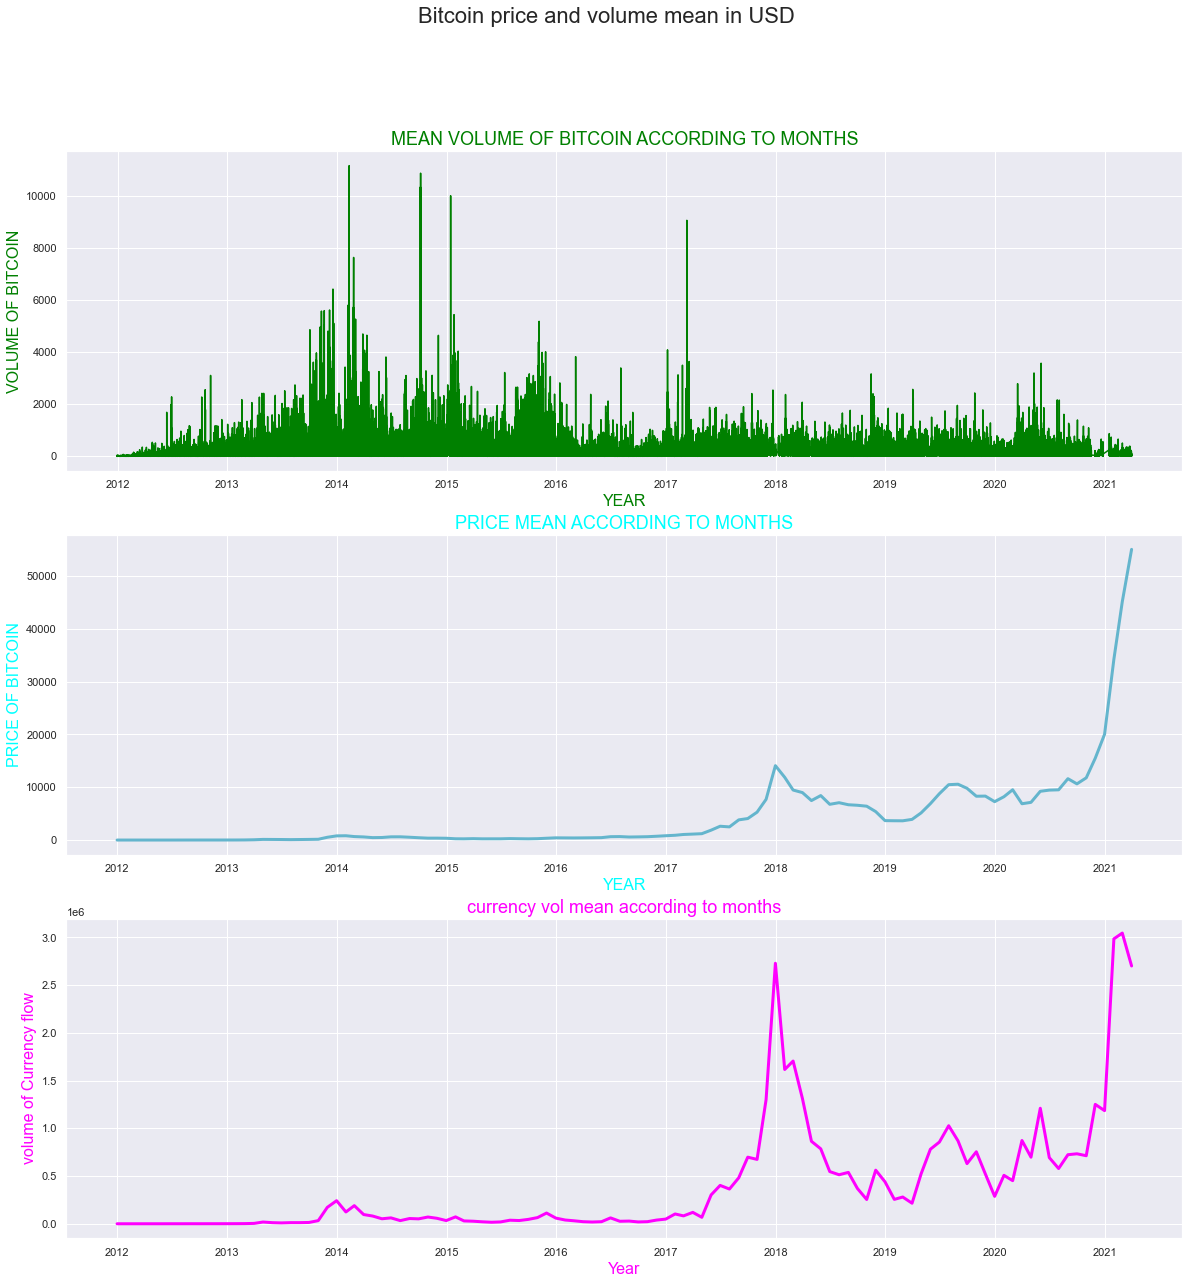

In [322]:
# PLOTS
fig = plt.figure(figsize=[20, 20]) # setting the figure size
plt.suptitle('Bitcoin price and volume mean in USD', fontsize=22)

#Plot for mean volume vs months
plt.subplot(311) ## position of plot 
plt.plot(df['Volume_(BTC)'], '-', label='By Months', color = 'green')  ## plot for volume 
plt.xlabel('YEAR', fontsize = 16, color = 'green')
plt.ylabel('VOLUME OF BITCOIN', fontsize = 16, color = 'green')
plt.title('MEAN VOLUME OF BITCOIN ACCORDING TO MONTHS', color = 'green', fontsize = 18)



#Plot for mean Price vs months
plt.subplot(312)
plt.plot(df_month.Weighted_Price, '-', label='By Months', linewidth = 3, markersize = 15, color='c')    ## plot for the prices
plt.title('PRICE MEAN ACCORDING TO MONTHS', color = 'cyan', fontsize = 18)
plt.xlabel('YEAR',  color = 'cyan', fontsize = 16)
plt.ylabel('PRICE OF BITCOIN',  color = 'cyan', fontsize = 16)

#Plot for mean currency volume vs months
plt.subplot(313)
plt.plot(df_month['Volume_(Currency)'], '-', label='By Months',  linewidth = 3 , markersize = 15, color='magenta')
plt.title('currency vol mean according to months', color = 'magenta', fontsize = 18)
plt.xlabel('Year', color = 'magenta', fontsize = 16)
plt.ylabel('volume of Currency flow', color = 'magenta', fontsize = 16 )

plt.show()

Text(0, 0.5, 'prices difference')

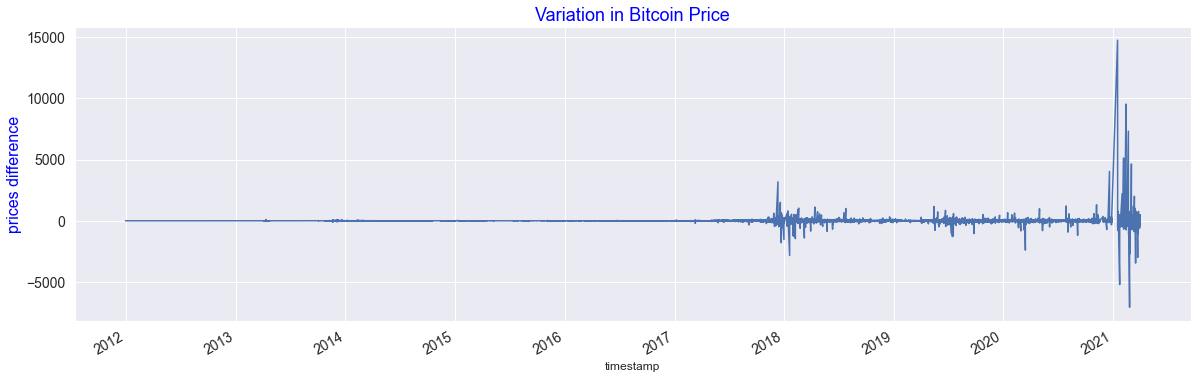

In [323]:
plt.title('Variation in Bitcoin Price', color = 'blue', fontsize = 18)
price_diff = df["Weighted_Price"].diff()        ##finding the difference of price for each row
ax=price_diff.plot(figsize=(20,6), fontsize = 14)
ax.set_ylabel('prices difference', color ='blue', fontsize = 16)

<AxesSubplot:title={'center':'Volume_(BTC)'}, xlabel='year'>

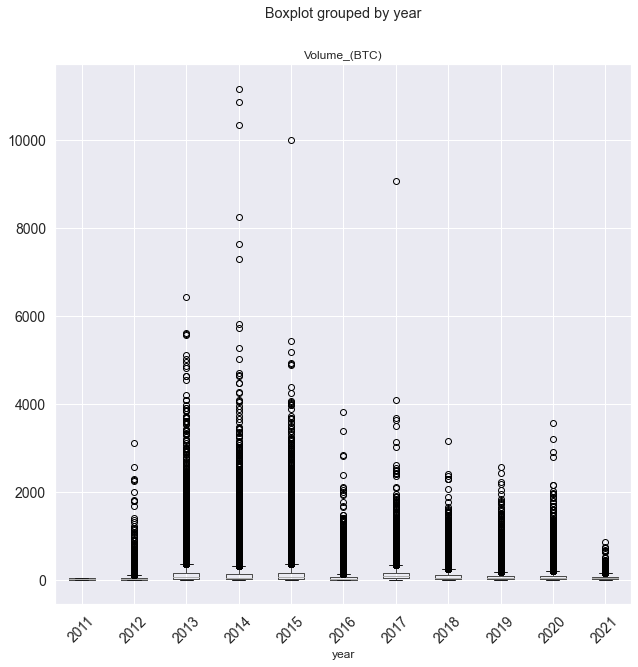

In [324]:
df.boxplot(column='Volume_(BTC)',by = 'year', figsize=(10,10), fontsize = 14, rot = 45)

<AxesSubplot:xlabel='year', ylabel='Volume_(BTC)'>

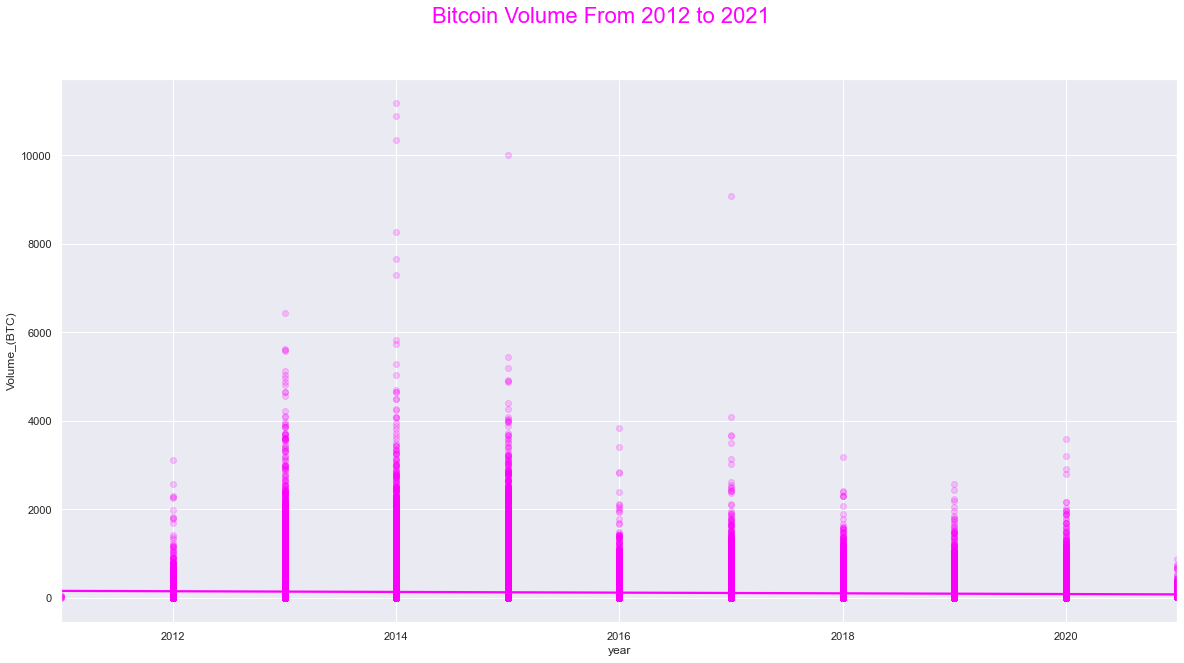

In [325]:
fig = plt.figure(figsize=[20, 10]) # setting the figure size
plt.suptitle('Bitcoin Volume From 2012 to 2021', fontsize=22, color = 'magenta')
sb.set_theme(color_codes=True)
sb.regplot(data = df, x = 'year', y = 'Volume_(BTC)', scatter_kws = {'alpha' : 3/15}, color = 'magenta') #the points are highly compact and they have discrete values 
#relationship between points cannot be deduced easily

<AxesSubplot:xlabel='year', ylabel='Volume_(BTC)'>

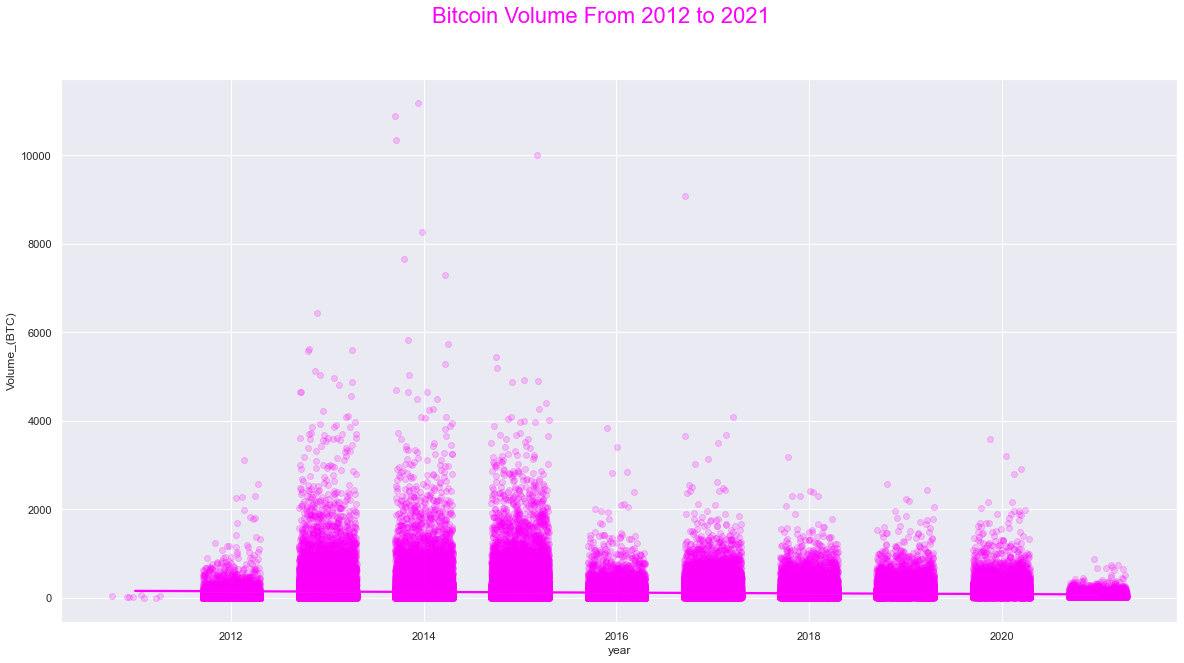

In [326]:
fig = plt.figure(figsize=[20, 10]) # setting the figure size
plt.suptitle('Bitcoin Volume From 2012 to 2021', fontsize=22, color = 'magenta')
sb.regplot(data = df, x = 'year', y = 'Volume_(BTC)', x_jitter=0.3, scatter_kws = {'alpha' : 3/15}, color = 'magenta')  #x_jitter a zoomed in view of the data
#


<AxesSubplot:xlabel='year', ylabel='Weighted_Price'>

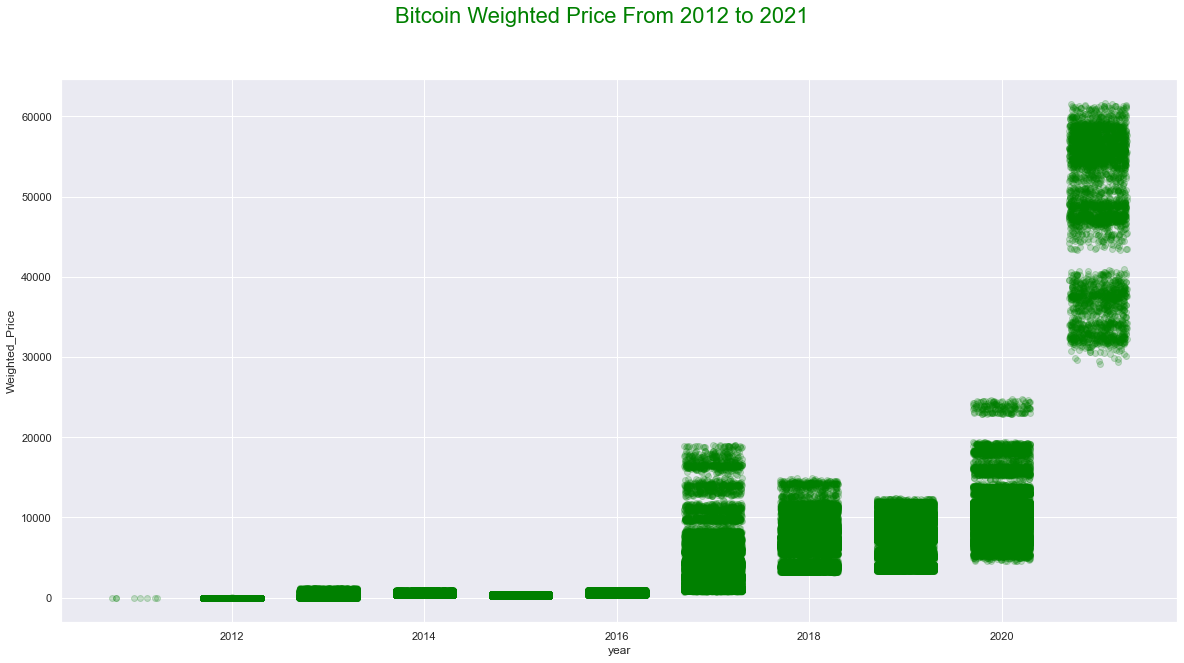

In [327]:

fig = plt.figure(figsize=[20, 10]) # setting the figure size
plt.suptitle('Bitcoin Weighted Price From 2012 to 2021', fontsize=22, color = 'green')
sb.regplot(data = df, x = 'year', y = 'Weighted_Price', x_jitter=0.3, fit_reg=False, scatter_kws = {'alpha' : 3/15}, color = 'green')  #x_jitter a zoomed in view of the data
#


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021')])

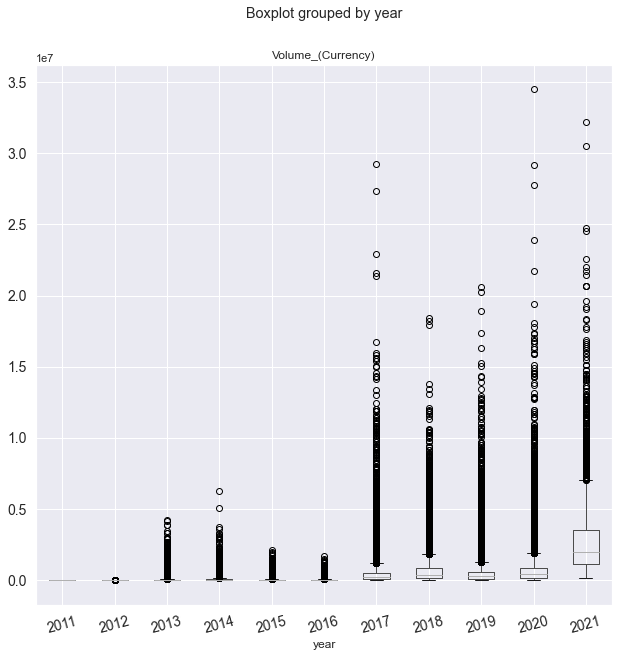

In [328]:
df.boxplot(column='Volume_(Currency)',by = 'year',  figsize=(10,10), fontsize = 14)
plt.xticks(rotation = 15)

In [329]:
yeardata=df[df.year>=2020]

Text(0.5, 1.0, 'Month - Highest Price of day Scatter Plot(2020-2021)')

<Figure size 1440x1080 with 0 Axes>

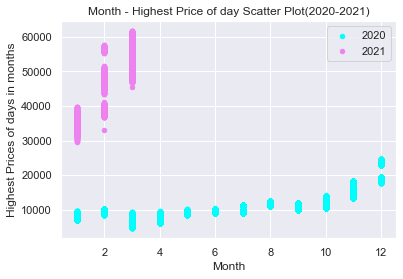

In [330]:
#Plot for price variation in year 2020-21
plt.figure(figsize=(20,15))
ax=yeardata[yeardata.year==2020].plot(kind='scatter', x='month', y='High',color = 'cyan',label='2020')
yeardata[yeardata.year==2021].plot(kind='scatter', x='month', y='High',color = 'violet',ax=ax,label='2021')
plt.xlabel('Month')              
plt.legend()
plt.ylabel('Highest Prices of days in months')

plt.title('Month - Highest Price of day Scatter Plot(2020-2021)') 

In [331]:
dat=df.resample('D').mean()#resample dataframe by days

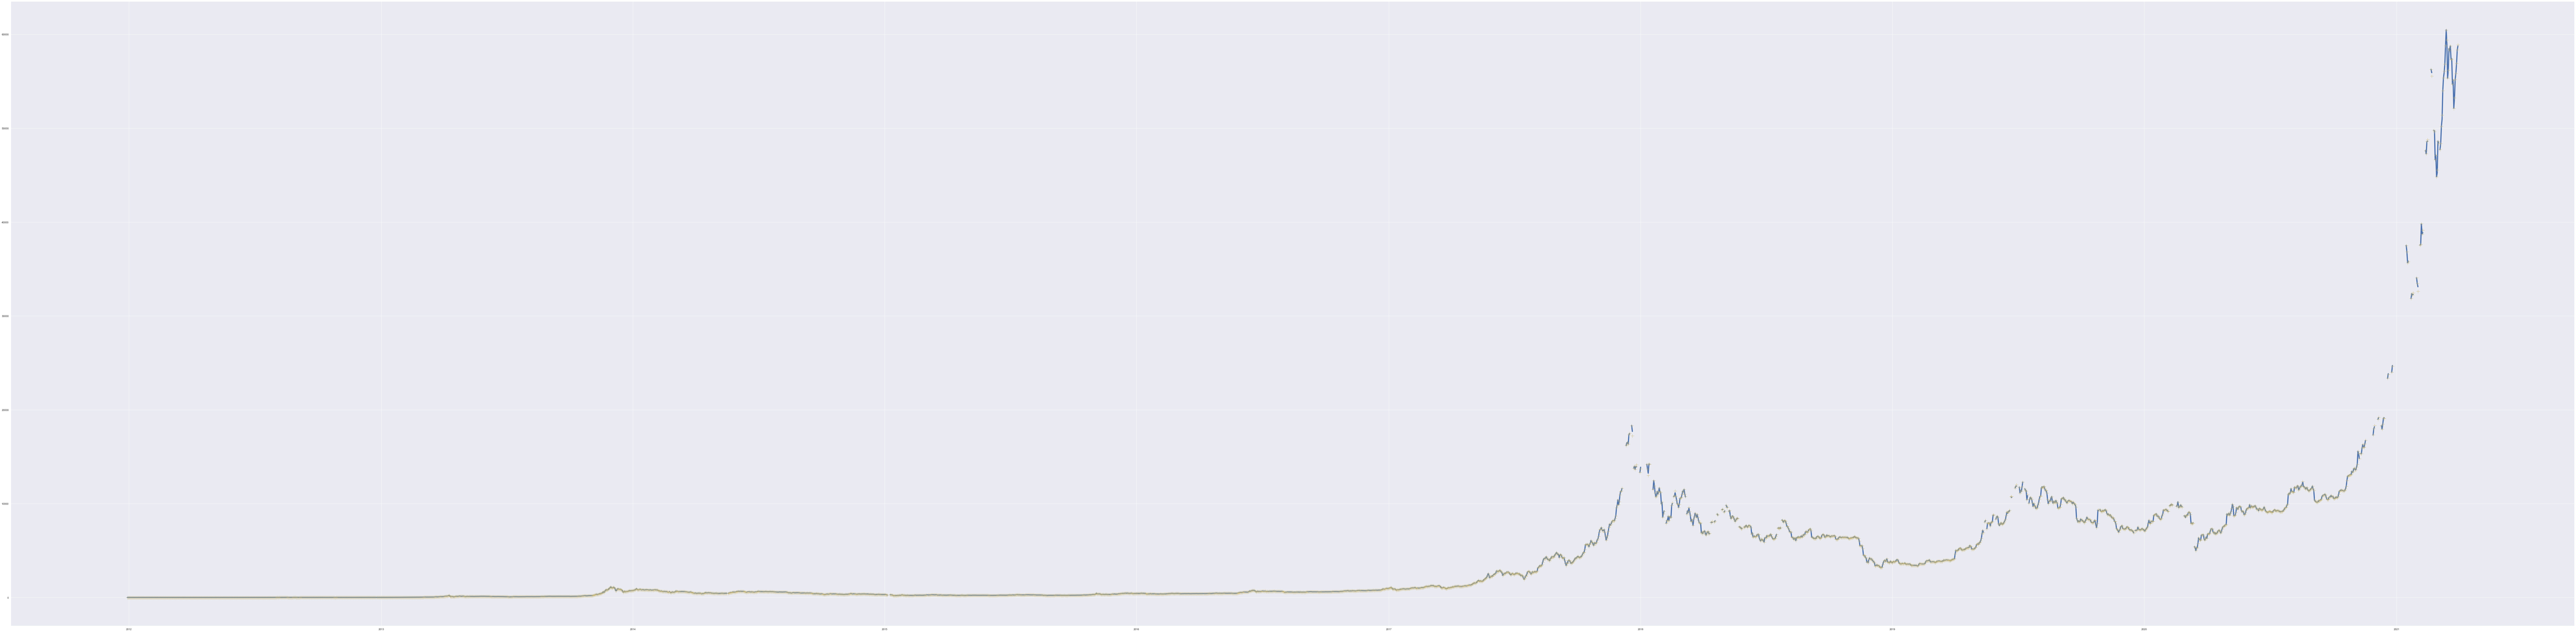

In [332]:
#plot the high and close price 
plt.figure(figsize=(200,50))
plt.plot(dat['Open'],'-',color='b', linewidth = 5 , markersize = 15,)
plt.plot(dat['Close'],'+',color='y', linewidth = 5 , markersize = 15, )
plt.show()

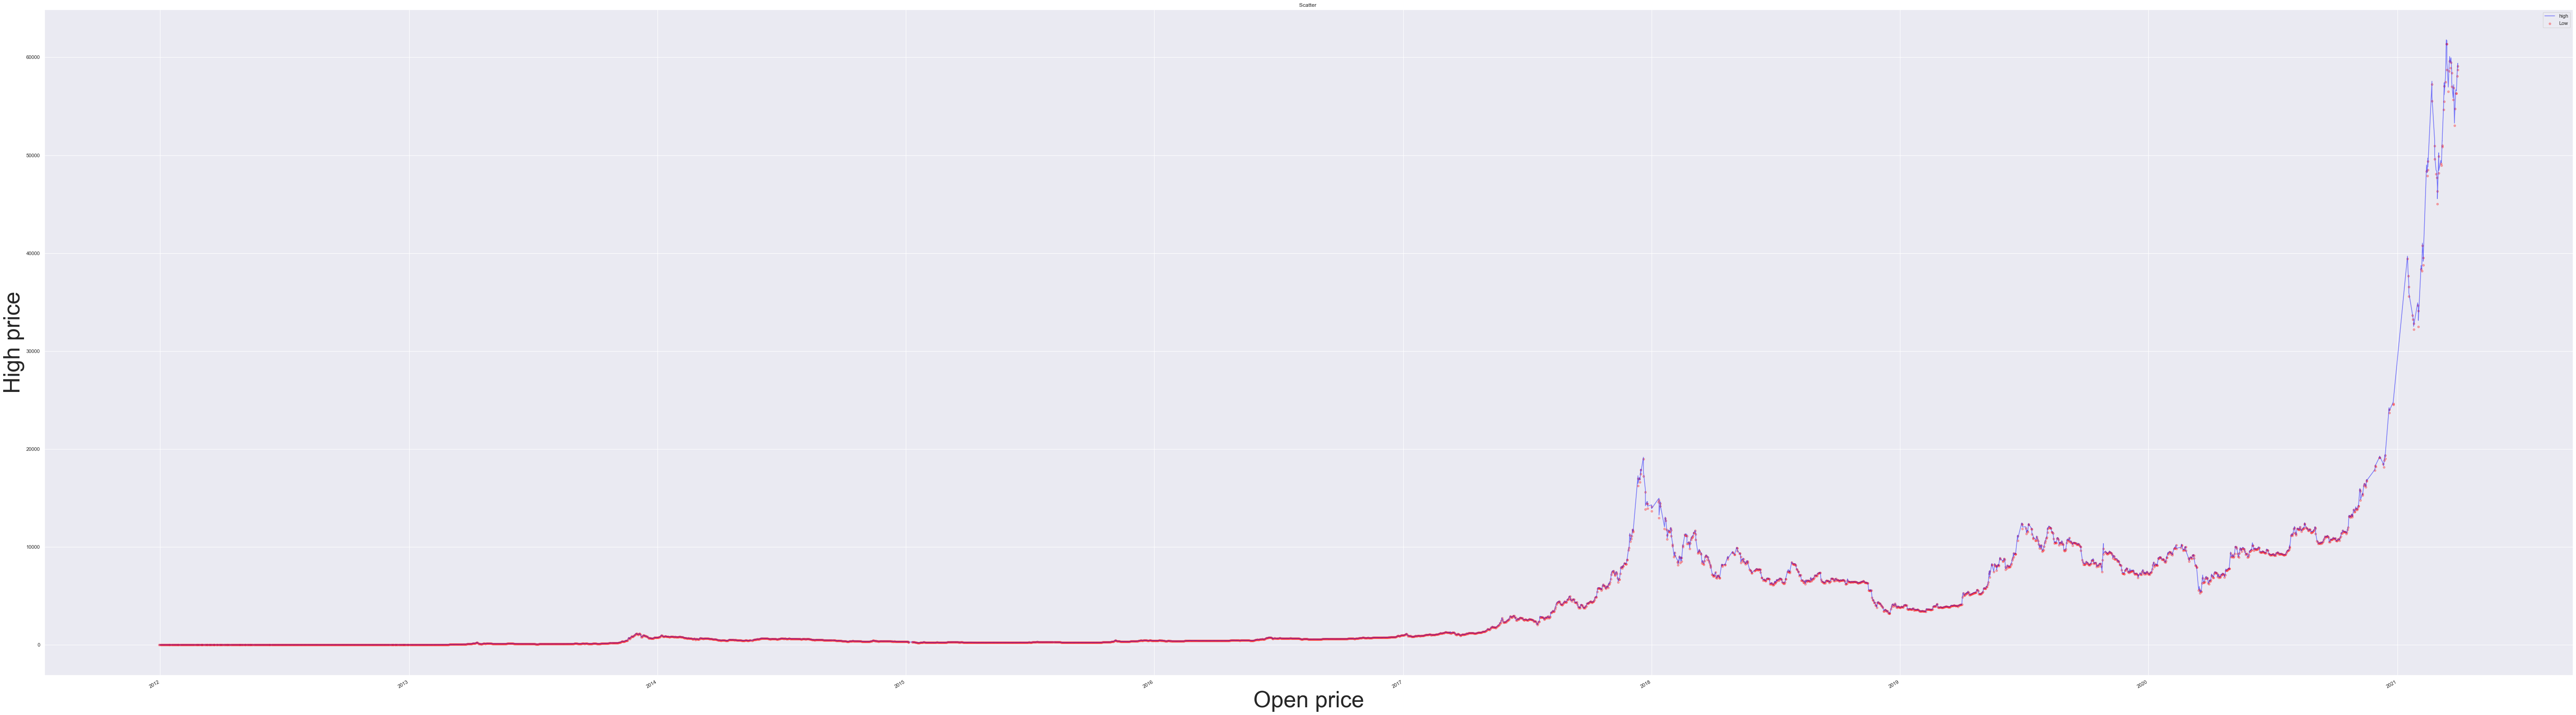

In [333]:
dfdate=df.groupby(['date']).max() #taking the max values for unique dates
#plot for open and low prices (date-wise)
ax=dfdate.plot(kind="scatter", y="Low",x='timestamp', alpha=0.3, color= "red",figsize=(100,30),label='Low')
dfdate.plot(kind="line", y="High",x='timestamp', alpha=0.5, color= "blue",ax=ax,label='high')
plt.xlabel("Open price", fontsize = 50)
plt.ylabel("High price",  fontsize = 50)
plt.legend()
plt.title("Scatter ")
plt.show()

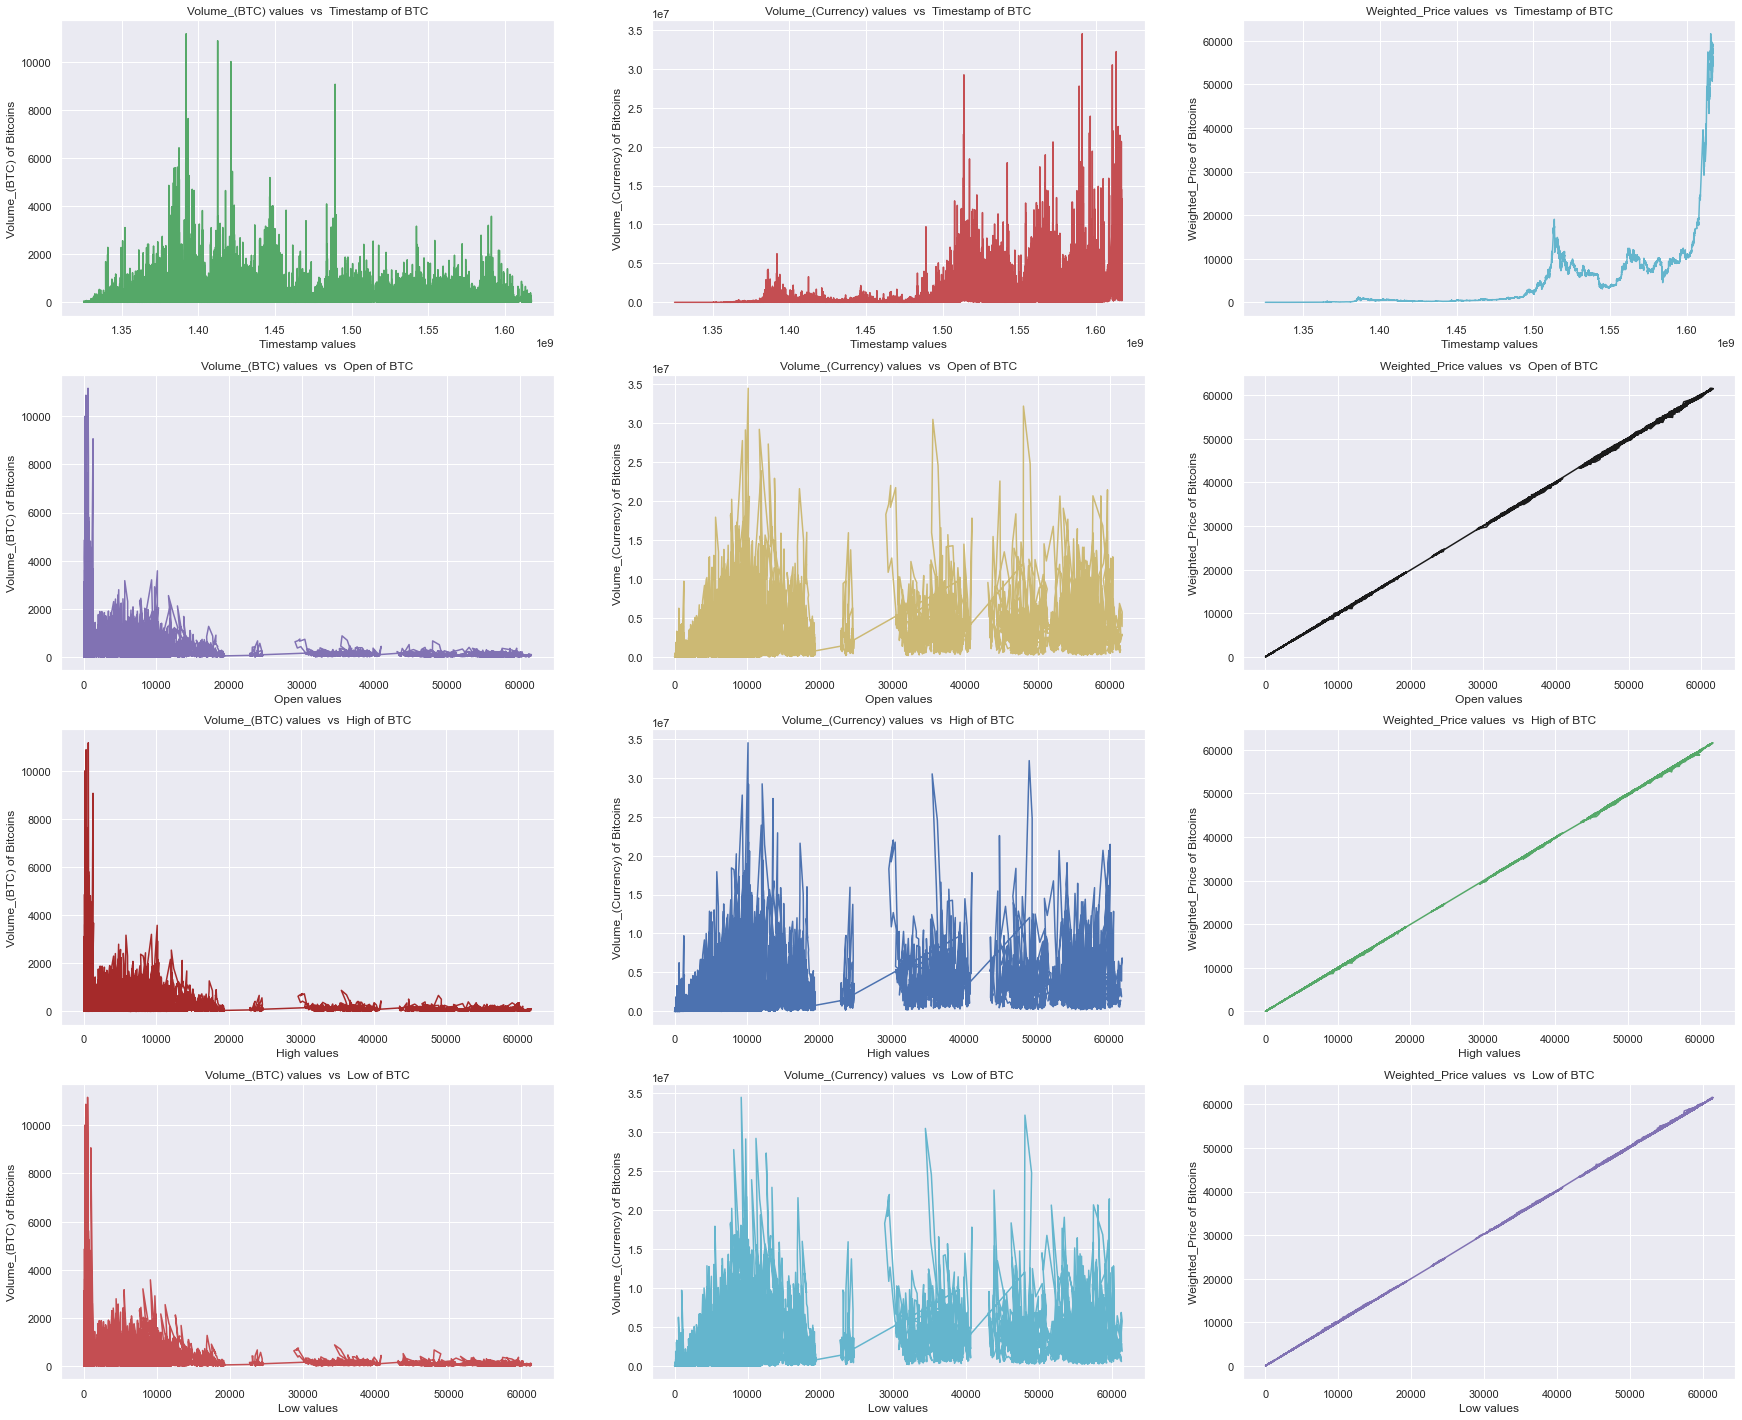

In [334]:
colors=['b','g','r','c','m','y','k','brown']
j=1
#plot for visualizing relation among prices and volumes
plt.figure(figsize=(30,25))
for col in df.columns[1:5]:
  for _ in range(3):
    if j%3==1:
      cmp='Volume_(BTC)'
    elif j%3==2:
      cmp='Volume_(Currency)'
    else:
      cmp='Weighted_Price'
    plt.subplot(4,3,j)
    plt.plot(df[col],df[cmp], color=colors[j%8])
    plt.xlabel(col+" values")
    plt.ylabel(cmp+" of Bitcoins")
    plt.title( cmp+" values  vs  "+col+" of BTC")
    j+=1

In [335]:
import seaborn as sns  #seaborn is another lib for visualization based on matplotlib

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


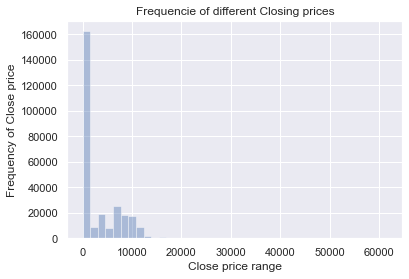

In [336]:
#plot for freq. over closing prices
ax=sns.distplot(df.Close,kde=False,bins=40) #ploting histogram 
ax.set_title('Frequencie of different Closing prices')
ax.set(xlabel='Close price range', ylabel='Frequency of Close price')
plt.show()


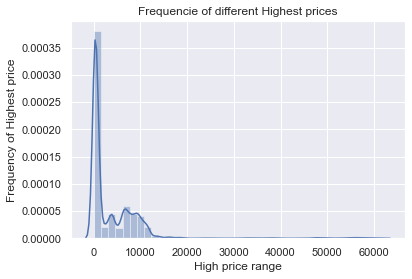

In [337]:
#plot for freq. over high prices 
ax=sns.distplot(df.High,kde=True,bins=40)
ax.set_title('Frequencie of different Highest prices')
ax.set(xlabel='High price range', ylabel='Frequency of Highest price')
plt.show()

<AxesSubplot:>

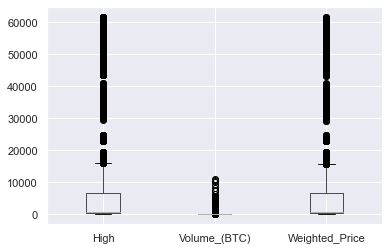

In [338]:
df.boxplot(column=['High', 'Volume_(BTC)', 'Weighted_Price'])

Text(0, 0.5, 'Avg price month wise')

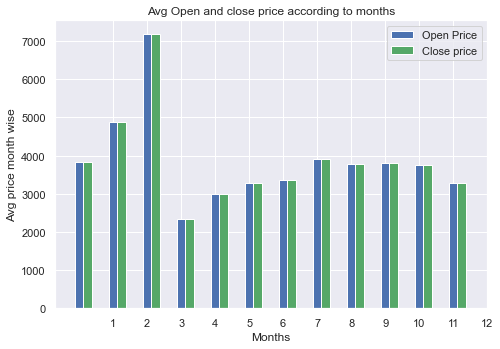

In [339]:
#plot for avg closing and opening prices over the period months
X = np.arange(12)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, df.groupby('month').mean()['Open'], color = 'b', width = 0.25,label='Open Price')
ax.bar(X + 0.25, df.groupby('month').mean()['Close'], color = 'g', width = 0.25,label='Close price')
ax.set_xticks(df.groupby('month').mean().index)
ax.set_title("Avg Open and close price according to months")
ax.set_xlabel("Months")
ax.legend()
ax.set_ylabel("Avg price month wise")

In [340]:
mn=df[df.year<2021]   ## dataframe for year before 2021

In [341]:
mn.head() #checking on the dataframe structure

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,timestamp,year,month,date
timestamp,,,,,,,,,,,,,
2011-12-30 10:45:00,0,1325241900,4.26,4.26,4.21,4.21,12.33,51.96,4.21,2011-12-30 10:45:00,2011,12,2011-12-30
2011-12-30 14:00:00,1,1325253600,4.50,4.50,4.50,4.50,4.20,18.90,4.50,2011-12-30 14:00:00,2011,12,2011-12-30
2011-12-30 15:15:00,2,1325258100,4.21,4.21,4.21,4.21,39.77,167.43,4.21,2011-12-30 15:15:00,2011,12,2011-12-30
2011-12-30 15:30:00,3,1325259000,4.21,4.21,4.21,4.21,0.44,1.85,4.21,2011-12-30 15:30:00,2011,12,2011-12-30
2011-12-31 07:45:00,4,1325317500,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31 07:45:00,2011,12,2011-12-31


Text(0, 0.5, 'Avg price month wise')

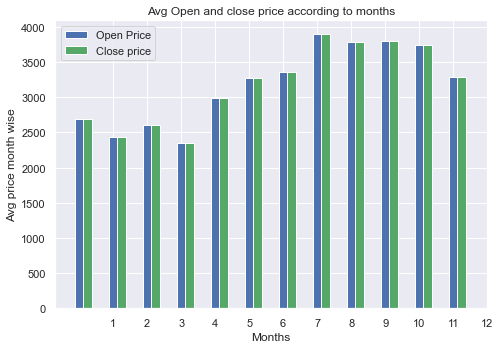

In [342]:
#plot of avg open and close price varies with month
X = np.arange(12)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, mn.groupby('month').mean()['Open'], color = 'b', width = 0.25,label='Open Price')
ax.bar(X + 0.25, mn.groupby('month').mean()['Close'], color = 'g', width = 0.25,label='Close price')
ax.set_xticks(mn.groupby('month').mean().index)
ax.set_title("Avg Open and close price according to months")
ax.set_xlabel("Months")
ax.legend()
ax.set_ylabel("Avg price month wise")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'Unnamed: 0'),
  Text(0, 1.5, 'Timestamp'),
  Text(0, 2.5, 'Open'),
  Text(0, 3.5, 'High'),
  Text(0, 4.5, 'Low'),
  Text(0, 5.5, 'Close'),
  Text(0, 6.5, 'Volume_(BTC)'),
  Text(0, 7.5, 'Volume_(Currency)'),
  Text(0, 8.5, 'Weighted_Price'),
  Text(0, 9.5, 'year'),
  Text(0, 10.5, 'month')])

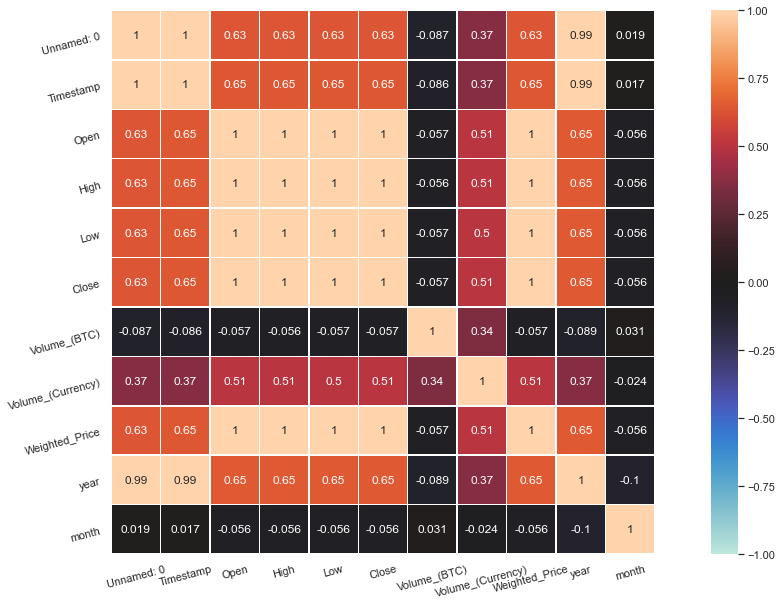

In [343]:
plt.figure(figsize = (20,10))
ax=sns.heatmap(df.corr(), annot = True,square=True,linewidths=.5,vmin=-1, vmax=1, center= 0)
plt.xticks(rotation = 15)
plt.yticks(rotation = 15)

In [344]:
df

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,timestamp,year,month,date
timestamp,,,,,,,,,,,,,
2011-12-30 10:45:00,0,1325241900,4.26,4.26,4.21,4.21,12.33,51.96,4.21,2011-12-30 10:45:00,2011,12,2011-12-30
2011-12-30 14:00:00,1,1325253600,4.50,4.50,4.50,4.50,4.20,18.90,4.50,2011-12-30 14:00:00,2011,12,2011-12-30
2011-12-30 15:15:00,2,1325258100,4.21,4.21,4.21,4.21,39.77,167.43,4.21,2011-12-30 15:15:00,2011,12,2011-12-30
2011-12-30 15:30:00,3,1325259000,4.21,4.21,4.21,4.21,0.44,1.85,4.21,2011-12-30 15:30:00,2011,12,2011-12-30
2011-12-31 07:45:00,4,1325317500,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31 07:45:00,2011,12,2011-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-30 23:00:00,276861,1617145200,58699.43,58734.72,58567.11,58733.62,7.85,460410.98,58628.91,2021-03-30 23:00:00,2021,3,2021-03-30
2021-03-30 23:15:00,276862,1617146100,58704.85,58748.45,58573.63,58748.45,5.69,334078.89,58662.70,2021-03-30 23:15:00,2021,3,2021-03-30
2021-03-30 23:30:00,276863,1617147000,58766.56,58766.56,58599.78,58600.00,24.67,1446170.82,58619.58,2021-03-30 23:30:00,2021,3,2021-03-30


In [345]:
#TRAINING THE MODEL

In [346]:
# Importing sklearn for RNN
from tensorflow.keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Dropout,Flatten,LSTM
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint

In [347]:
df.head()  #getting a view of the dataset

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,timestamp,year,month,date
timestamp,,,,,,,,,,,,,
2011-12-30 10:45:00,0,1325241900,4.26,4.26,4.21,4.21,12.33,51.96,4.21,2011-12-30 10:45:00,2011,12,2011-12-30
2011-12-30 14:00:00,1,1325253600,4.50,4.50,4.50,4.50,4.20,18.90,4.50,2011-12-30 14:00:00,2011,12,2011-12-30
2011-12-30 15:15:00,2,1325258100,4.21,4.21,4.21,4.21,39.77,167.43,4.21,2011-12-30 15:15:00,2011,12,2011-12-30
2011-12-30 15:30:00,3,1325259000,4.21,4.21,4.21,4.21,0.44,1.85,4.21,2011-12-30 15:30:00,2011,12,2011-12-30
2011-12-31 07:45:00,4,1325317500,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31 07:45:00,2011,12,2011-12-31


In [348]:
df['Date']=pd.to_datetime(df['Timestamp'],unit='s').dt.date

In [349]:
X=df.groupby('Date')['Weighted_Price'].max()         ## creating of mean price for the unique date

In [350]:
X.shape

(3240,)

In [351]:
#Spliting the data with test size = 15% and training set 85%
train_size = int(len(X)*0.85)

train_data = X[0:train_size]
test_data = X[train_size:]

In [352]:
train_data=np.array(train_data)
train_data=train_data.reshape(train_data.shape[0],1)

In [353]:
# standardizing points for faster descent
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_data=scaler.fit_transform(train_data)

In [354]:
timestep=30
x_train=[]
y_train=[]
# creating new sample points
for i in range(timestep,train_data.shape[0]):
    x_train.append(train_data[i-timestep:i,0])
    y_train.append(train_data[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) #reshaped for RNN
print("x_train shape= ",x_train.shape)
print("y_train shape= ",y_train.shape)

x_train shape=  (2724, 30, 1)
y_train shape=  (2724,)


In [355]:
# init the model for RNN
reg=Sequential()

reg.add(SimpleRNN(128,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.3))
reg.add(SimpleRNN(256,return_sequences=True,activation='relu'))
reg.add(Dropout(0.3))
reg.add(SimpleRNN(64,return_sequences=True,activation='relu'))
reg.add(Dropout(0.3))
reg.add(Flatten())
reg.add(Dense(1))


reg.compile(optimizer='adam',loss='mean_squared_error')


In [356]:
#training the model
val=reg.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.1)

Epoch 1/100
77/77 [==============================] - 32s 250ms/step - loss: 0.1345 - val_loss: 0.0856
Epoch 2/100
77/77 [==============================] - 17s 227ms/step - loss: 0.0559 - val_loss: 0.0746
Epoch 3/100
77/77 [==============================] - 18s 228ms/step - loss: 0.0425 - val_loss: 0.0459
Epoch 4/100
77/77 [==============================] - 18s 230ms/step - loss: 0.0303 - val_loss: 0.1283
Epoch 5/100
77/77 [==============================] - 18s 228ms/step - loss: 0.0244 - val_loss: 0.0306
Epoch 6/100
77/77 [==============================] - 18s 230ms/step - loss: 0.0253 - val_loss: 0.1504
Epoch 7/100
77/77 [==============================] - 18s 230ms/step - loss: 0.0225 - val_loss: 0.0322
Epoch 8/100
77/77 [==============================] - 18s 231ms/step - loss: 0.0196 - val_loss: 0.0188
Epoch 9/100
77/77 [==============================] - 18s 230ms/step - loss: 0.0198 - val_loss: 0.0252
Epoch 10/100
77/77 [==============================] - 18s 230ms/step - loss: 0.018

In [357]:
reg.save('/model/timestamp_priceRNN.h5')    #saving the model

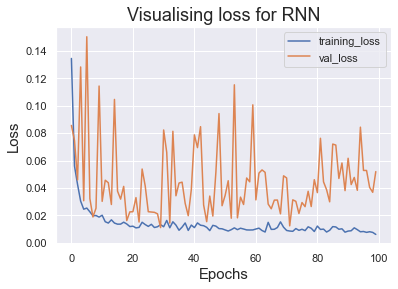

In [358]:
#plot for change in loss vs epochs
training_loss = val.history['loss']
val_loss = val.history['val_loss']

plt.plot(training_loss,label='training_loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.title('Visualising loss for RNN',fontsize=18)
plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.show()

In [359]:
# getting the test data
inputs=X[len(X)-len(test_data)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)  #standardizing

In [360]:
# preparing sample points for test data
x_test=[]
y_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
    y_test.append(inputs[i,0])
x_test=np.array(x_test)
y_test=np.array(y_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [361]:
pred = reg.predict(x_test)               #predicting on test data
rnn_pred=scaler.inverse_transform(pred)  #inverse transform the standardizing for test sample

In [362]:
data_test=np.array(test_data)
data_test=data_test.reshape(len(data_test),1)

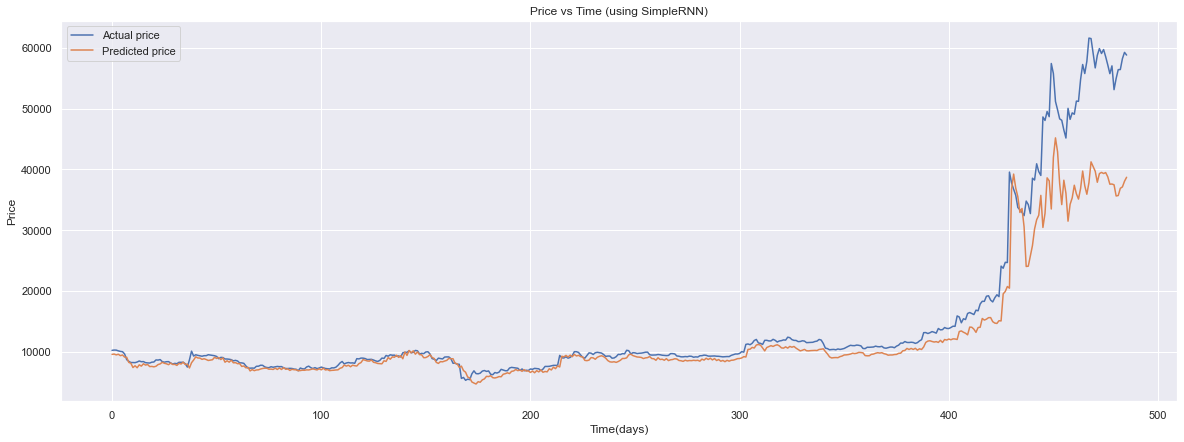

In [363]:
#plot the actual price vs rnn predicted price
plt.figure(figsize = (20,7))
plt.plot(data_test,'-')
plt.plot(rnn_pred,'-')
plt.xlabel('Time(days)')
plt.ylabel('Price')
plt.title('Price vs Time (using SimpleRNN)')
plt.legend(['Actual price', 'Predicted price'])
plt.show()

In [364]:
#Long Short Term Memory networks to predict price of Bitcoin

In [365]:
#init lstm model 
lstm=Sequential()

lstm.add(LSTM(64,input_shape=(x_train.shape[1],1),activation="relu"))


lstm.add(Dense(1))

lstm.compile(loss="mean_squared_error",optimizer="adam")

hist=lstm.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.1)

Epoch 1/100
77/77 [==============================] - 11s 81ms/step - loss: 0.1939 - val_loss: 0.1223
Epoch 2/100
77/77 [==============================] - 5s 70ms/step - loss: 0.0276 - val_loss: 0.0443
Epoch 3/100
77/77 [==============================] - 5s 68ms/step - loss: 0.0148 - val_loss: 0.0387
Epoch 4/100
77/77 [==============================] - 5s 67ms/step - loss: 0.0117 - val_loss: 0.0387
Epoch 5/100
77/77 [==============================] - 5s 65ms/step - loss: 0.0100 - val_loss: 0.0168
Epoch 6/100
77/77 [==============================] - 5s 66ms/step - loss: 0.0083 - val_loss: 0.0390 loss: - ETA: 0
Epoch 7/100
77/77 [==============================] - 5s 64ms/step - loss: 0.0080 - val_loss: 0.0159
Epoch 8/100
77/77 [==============================] - 5s 66ms/step - loss: 0.0069 - val_loss: 0.0146
Epoch 9/100
77/77 [==============================] - 5s 65ms/step - loss: 0.0062 - val_loss: 0.0178
Epoch 10/100
77/77 [==============================] - 5s 64ms/step - loss: 0.0058 - 

In [366]:
lstm.save('/model/timeseries_price_LSTM.h5')

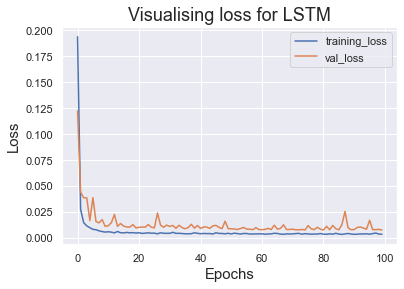

In [367]:
#plot loss for LSTM
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(training_loss,label='training_loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.title('Visualising loss for LSTM',fontsize=18)
plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.show()

In [368]:
pred = lstm.predict(x_test)          #making prediction
lstm_pred=scaler.inverse_transform(pred)

In [369]:
print('MSE : ' + str(mean_squared_error(y_test, pred)))
rnn_score = r2_score(y_test,pred)
print("R2 Score of LSTM model = ",rnn_score)

MSE : 3.0962942427350812
R2 Score of LSTM model =  0.8104849938905461


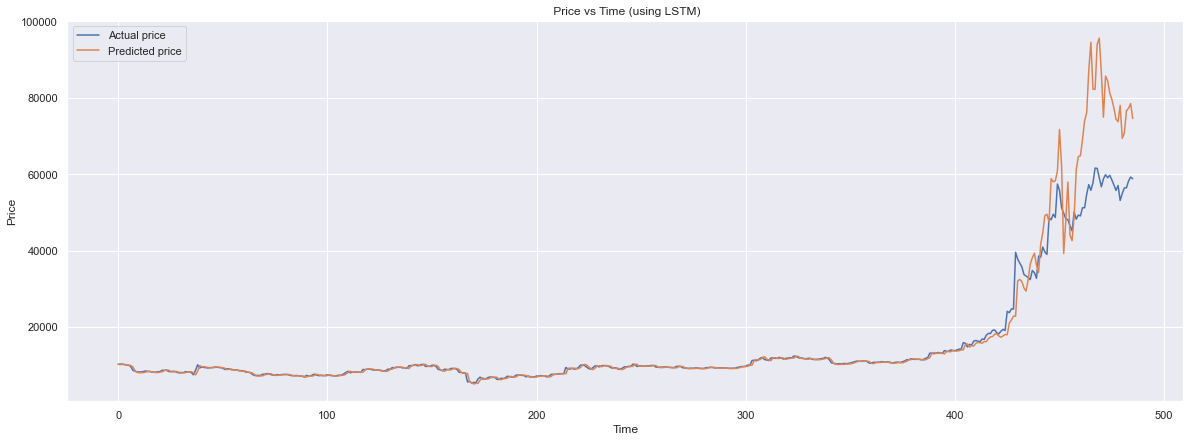

In [370]:
#plot actual value vs predicted value for LSTM
plt.figure(figsize = (20,7))
plt.plot(data_test,'-')
plt.plot(lstm_pred,'-')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(' Price vs Time (using LSTM)')
plt.legend(['Actual price', 'Predicted price'])
plt.show()

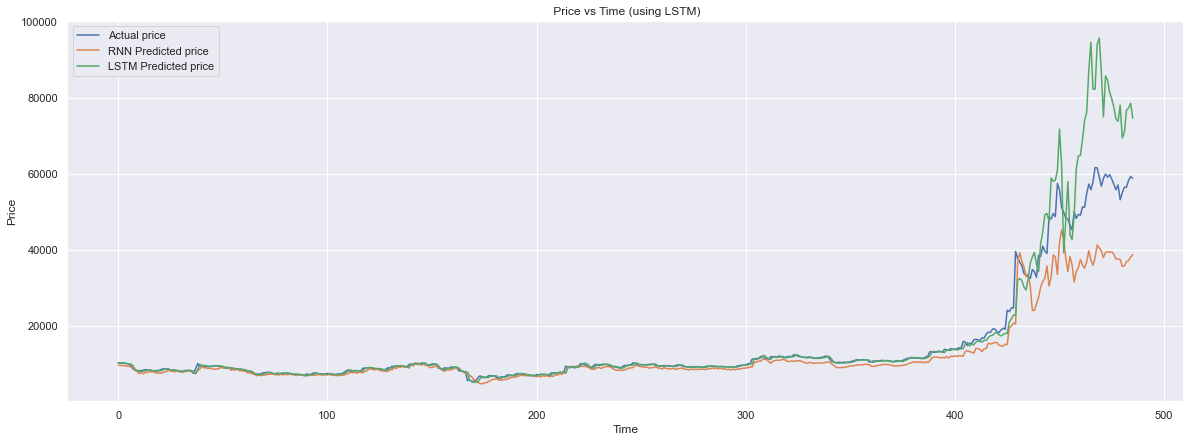

In [371]:
# plot actual vs predcited value by RNN vs predicted value by LSTM
plt.figure(figsize = (20,7))
plt.plot(data_test,'-',label='Actual price')
plt.plot(rnn_pred,'-',label='RNN Predicted price')
plt.plot(lstm_pred,'-',label='LSTM Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(' Price vs Time (using LSTM)')
plt.legend()
plt.show()

In [372]:
#Prediction of Bitcoin Price for the next 30 days

In [373]:
prediction=x_test[-1]    ##taking the last 30 days datasets to predict data for next 30days

In [374]:
for i in range(30):  # looping for 30 days,to predict for next coming days
    kl=prediction[i:timestep+i].reshape(1,timestep,1)       
    prediction=np.append(prediction,lstm.predict(kl),axis=0)   ##append predicted data using previous 30 days 

In [375]:
prediction=scaler.inverse_transform(prediction)  

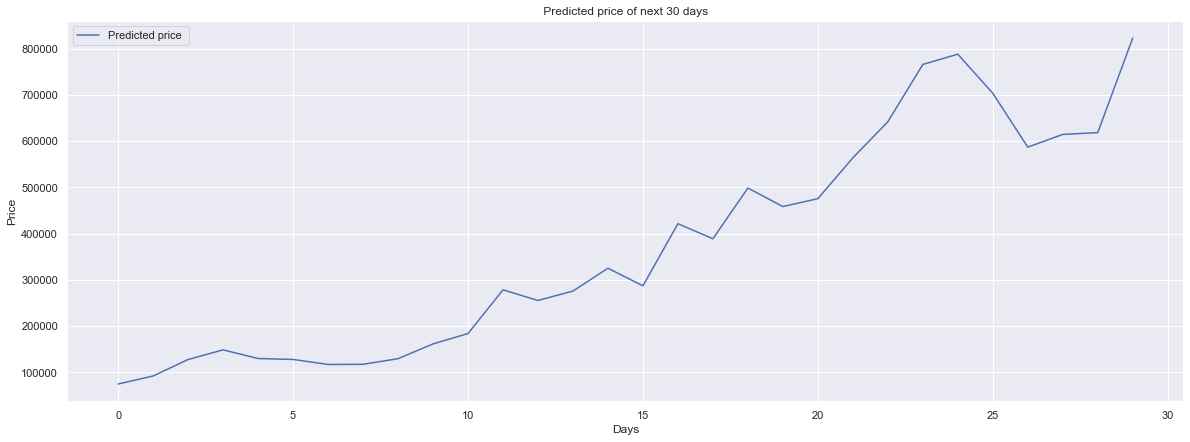

In [376]:
#plot price for coming 30 days
plt.figure(figsize = (20,7))
plt.plot(prediction[30:],'-',label='Predicted price ')

plt.xlabel('Days')
plt.ylabel('Price')
plt.title(' Predicted price of next 30 days ')
plt.legend()
plt.show()

In [377]:
#END OF PROJECT